# AVANI AGRAWAL

# Data Science Intern at LetsGrowMore


# Intermediate level task 1 - Exploratory Data Analysis on Dataset - Terrorism 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
from plotly.offline import iplot

#to display all columns we use :
pd.pandas.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv('C:\\Users\\HP\\Desktop\\globalterrorismdb_0718dist.csv')

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
data.shape

(181691, 135)

In [5]:
# There are 135 columns and 181691 enteries

There are so many columns in data so we need to consider only the important ones

In [6]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
# I'm just take important data in whole dataset those I'm using further processing.
data=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

# TOP ATTACK TYPE

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'count')

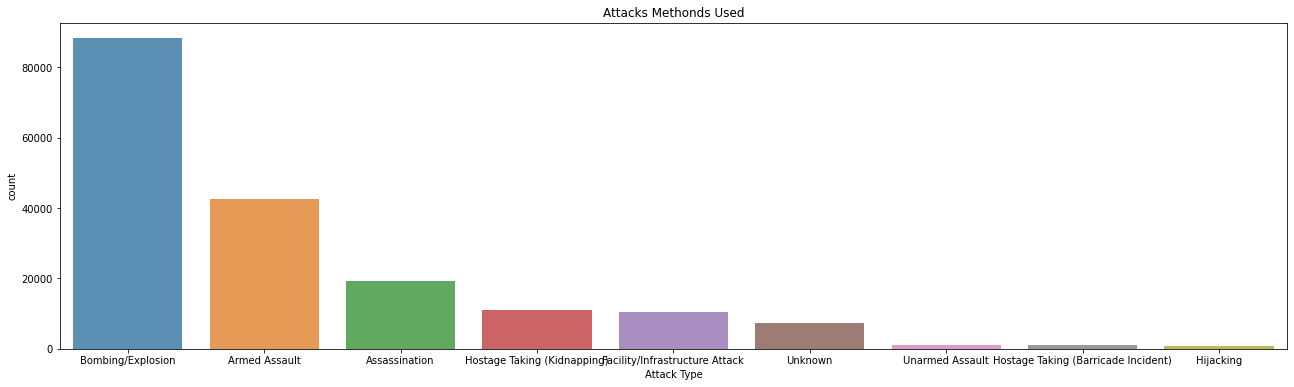

In [8]:
attack=data['AttackType'].value_counts().sort_values(ascending = False)
plt.figure(figsize=(22,6))
sns.barplot(attack.index, attack.values, alpha = 0.8)
plt.title("Attacks Methonds Used")
plt.xlabel('Attack Type')
plt.ylabel('count')

Text(0, 0.5, 'Count of people killed')

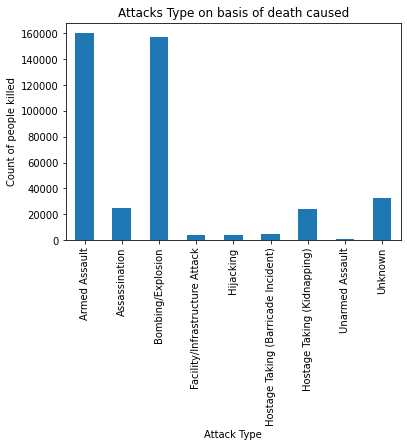

In [9]:
# lets see attack type on basis of people killed
data.groupby('AttackType')['Killed'].sum().plot.bar()
plt.title("Attacks Type on basis of death caused")
plt.xlabel('Attack Type')
plt.ylabel('Count of people killed')

## OBSERVATION: From here we see that Armed Assault killed maximum people i.e around 160k followed by Bombing explosion that is why they are the most used attack types

## MOST ACTIVE TERRORIST GROUP

In [10]:
# lets see the most dangerous terrorist groups
data['Group'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Miguel d'Escoto Brockman Community Movement             1
Nihilistic Patrol and Neighborhood Arsonists            1
Minority Unity Forum                                    1
Mexican Revolutionary Movement                          1
Pataxo Indians                                          1
Name: Group, Length: 3537, dtype: int64

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



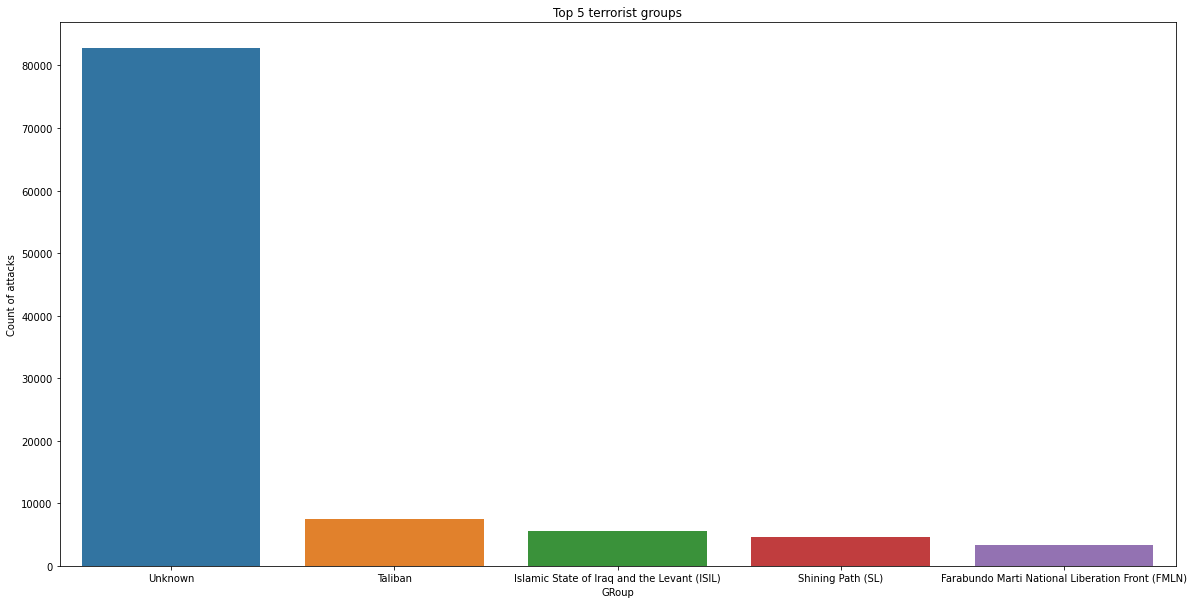

In [11]:
plt.figure(figsize=(20,10))
gangs=data['Group'].value_counts().index
sns.countplot(data['Group'], order=gangs[:5])
plt.xlabel("GRoup")
plt.ylabel("Count of attacks")
plt.title("Top 5 terrorist groups")
plt.show()

##  OBSERVATION: As we see that most of the attacks are caused by Unknown Group followed by Taliban .

##  TOP TARGETS

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'count')

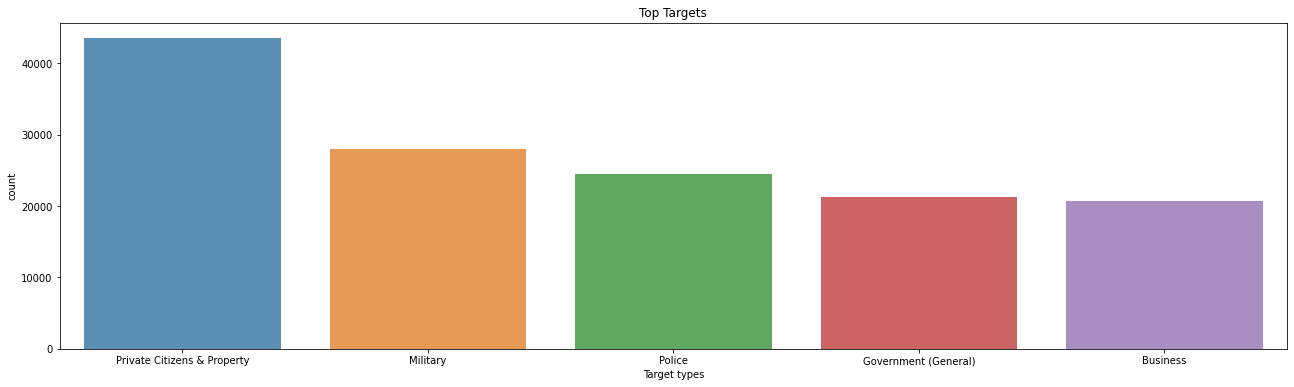

In [12]:
target=data['Target_type'].value_counts().sort_values(ascending = False)
target=target[:5]
plt.figure(figsize=(22,6))
sns.barplot(target.index, target.values, alpha = 0.8)
plt.title("Top Targets")
plt.xlabel('Target types')
plt.ylabel('count')

## OBSERVATION : Here we see that Private citizens & Property are most targeted followed by military.

In [13]:
# lets see the null values
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [14]:
print("Country with maximum attacks: {}".format(data['Country'].value_counts().idxmax()))
print("Region with maximum attacks: {}".format(data['Region'].value_counts().idxmax()))
print("Year with maximum attacks: {}".format(data['Year'].value_counts().idxmax()))
print("Total people killed: {}".format(data['Killed'].sum()))

Country with maximum attacks: Iraq
Region with maximum attacks: Middle East & North Africa
Year with maximum attacks: 2014
Total people killed: 411868.0


## NUMBER OF TERRORIST ACTIVITIES EACH YEAR 


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Attacks every year')

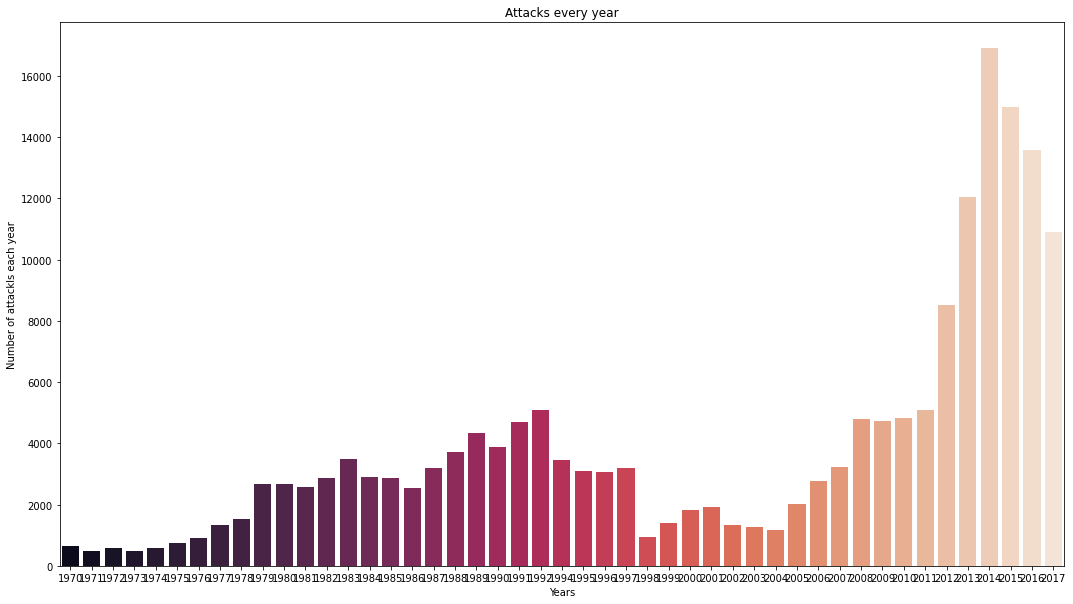

In [15]:
x=data['Year'].unique()
y=data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x,y,palette='rocket')
plt.xlabel("Years")
plt.ylabel("Number of attackls each year")
plt.title("Attacks every year")

## OBSERVATION : Here we see that maximum attacks had been there in year 2014


## Terrorist Activities by Region in each Year 

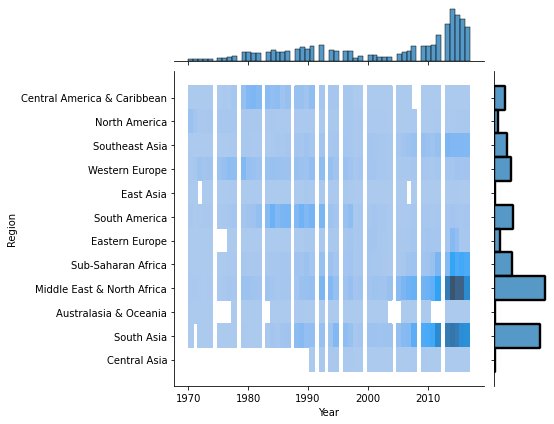

In [16]:
sns.jointplot(x='Year',y='Region',data=data,kind='hist')

## OBSERVATION: From here we see that most of the attacks were after 2010 and in regions like Midele East & North Africa and Central America & Caribbean and South Asia

# TERRORIST ACTIVITIES BY COUNTRY 

In [17]:
data['Country'].value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



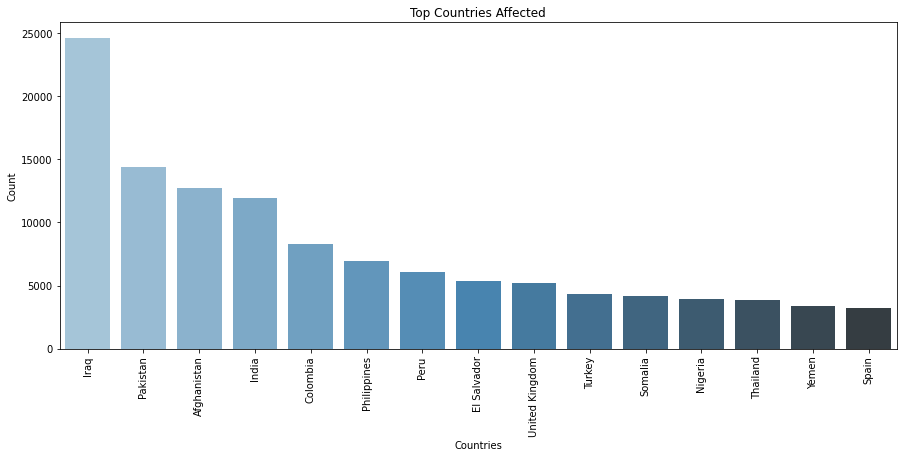

In [18]:
plt.subplots(figsize=(15,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

## OBSERVATION: We see that Iraq is the country where most of the terrorist attacks have taken place followed by Pakistan , Afghanistan and India

# CASUALITIES FOR EACH COUNTRY/REGION

In [19]:
data['Wounded']=data['Wounded'].fillna(0).astype(int)
data['Killed']=data['Killed'].fillna(0).astype(int)
data['Casualities']=data['Wounded']+data['Killed']  

# casualities= killed +wounded (here we have combined the two values into one category)

In [20]:
terror=data.sort_values('Casualities',ascending=False)[:40]
terror1=terror.pivot_table(index='Country',columns='Year',values='Casualities')
terror1.fillna(0,inplace=True)
terror1.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# here is the dataFrame of top 40 worst attcks on basis of casualities

In [22]:
## now lets see the reltion between them using heatmap
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
heatmap = go.Heatmap(z=terror1.values, x=terror1.columns, y=terror1.index)
data = [heatmap]
fig = go.Figure(data=data)
py.iplot(fig, filename='heatmap',show_link=False)

## OBSERVATION: From this heatmap when we move our cursor we see the value of casualities in respective country and year i.e maximum for US in 2001 where 9574 people faced casualities

In [23]:
heat1=terror.pivot_table(index='Region',columns='Year',values='Casualities')
heat1.fillna(0,inplace=True)
heat1.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Region,,,,,,,,,,,,,,,,,,,
Central Asia,0.0,0.0,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
East Asia,0.0,0.0,0.0,507.0,3092.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Eastern Europe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1071.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Middle East & North Africa,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,702.0,0.0,833.333333,0.0,654.0,927.5,0.0,911.666667,0.0
North America,0.0,751.0,0.0,0.0,818.0,0.0,0.0,0.0,9574.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,910.0


In [24]:
# plotting the same graph for region versus casualities
heatmap = go.Heatmap(z=heat1.values, x=heat1.columns, y=heat1.index)
data = [heatmap]
fig = go.Figure(data=data)
py.iplot(fig, filename='heatmap',show_link=False)

## OBSERVATION: here we see that North America faced maximum casualities followed by Sub Saharan Africa

## Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries